In [1]:
import pandas as pd
import numpy as np

In [2]:
add = "ConsumerReview_Data.csv"

reviews = pd.read_csv(add,low_memory=False)
reviews.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

In [3]:
reviews.nunique()


id                 42
name               48
asins              41
brand               6
categories         41
keys               42
manufacturer        2
date             1078
dateAdded        1941
dateSeen         3911
didPurchase         1
doRecommend         2
id                  1
numHelpful         97
rating              5
sourceURLs      11929
text            34659
title           19767
userCity            0
userProvince        0
username        26789
dtype: int64

In [4]:
reviews.isnull().sum()
#lets drop usernames, userProvince,id,didPurchase

id                  0
name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
didPurchase     34659
doRecommend       594
id              34659
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
userCity        34660
userProvince    34660
username            2
dtype: int64

In [5]:
reviews.drop(labels=['didPurchase','id','userCity','userProvince'],axis=1,inplace=True)

In [6]:
reviews.isnull().sum()

name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
doRecommend       594
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
username            2
dtype: int64

Total ratings : 34658
Total users : 26789
Users giving bulk ratings (more than 10) : 146
Bulk ratings : 3160
Populations of bulk ratings : 9.117664031392463
Populations of bulk users : 0.5449998133562283


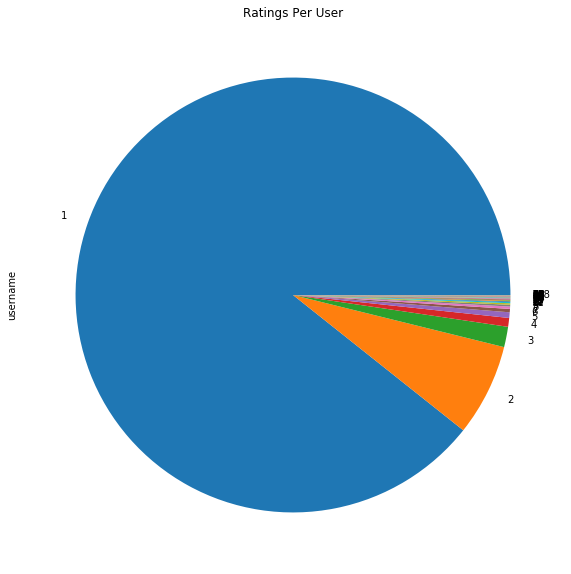

In [7]:
rating_perperson=reviews.username.value_counts()
#ratings 
print ("Total ratings : " + str(sum(rating_perperson)))
print ("Total users : " + str(len(rating_perperson)))
print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
bulk = rating_perperson[rating_perperson >10]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')

count    3158.000000
mean        4.593414
std         0.732940
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
count    31469.000000
mean         4.583686
std          0.735930
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


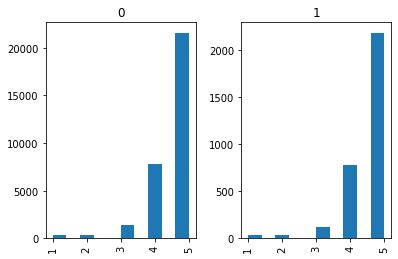

In [8]:
reviews['bulk']= reviews['username'].apply(lambda x : 1 if x in bulk.index else 0)
#gives us the category whether a rating is bulk or not
from matplotlib import pyplot
#series.hist(by=series)
print(reviews.rating.hist(by=reviews.bulk))
print(reviews[reviews.bulk==1].rating.describe())
print(reviews[reviews.bulk==0].rating.describe())

*** Rating distribution ***
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64


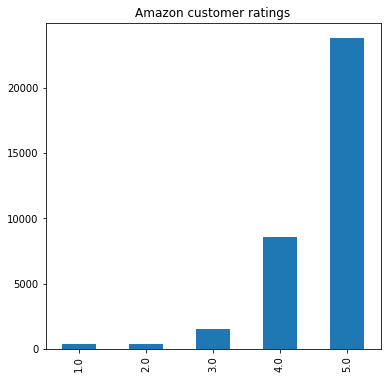

In [9]:
from matplotlib import pyplot
%matplotlib inline

star = reviews.rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

In [10]:
#Net Promoter Score help us evaluate consumer satisfaction and loyalty
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon is : "  + str(NPS_score))

 NPS score of Amazon is : 61.99


In [11]:
#Now lets analyze for any one particular product
kindle = reviews[reviews.name=='Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,']

In [12]:
kindle.isnull().sum()
# The dataset looks good to go

name            0
asins           0
brand           0
categories      0
keys            0
manufacturer    0
date            0
dateAdded       0
dateSeen        0
doRecommend     0
numHelpful      0
rating          0
sourceURLs      0
text            0
title           0
username        0
bulk            0
dtype: int64

 NPS score of Kindle is : 77.08


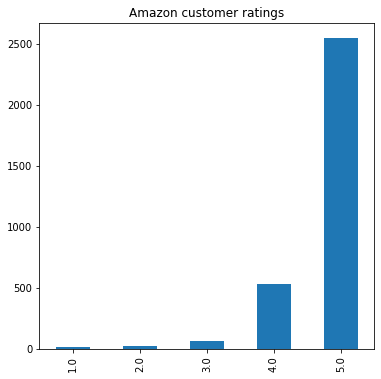

In [13]:
kindle_s = kindle.rating.value_counts()
kindle_s.sort_index(inplace=True)

Kindle_NPS_score = round (100*(kindle_s[5]-sum(kindle_s[1:3]))/sum(kindle_s),2)
print (" NPS score of Kindle is : "  + str(Kindle_NPS_score))
#better NPS than overall amazon
kindle_s.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

In [14]:
kindle.doRecommend.value_counts()

True     3111
False      65
Name: doRecommend, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013D09239608>,
      dtype=object)

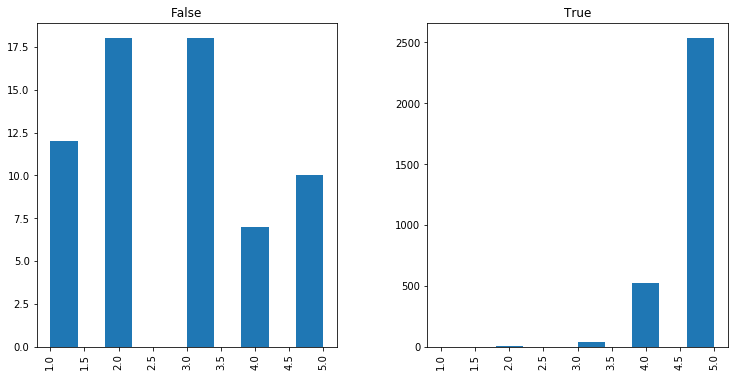

In [15]:
kindle.rating.hist(by=kindle.doRecommend,figsize=(12,6))

In [16]:
plus_kindle = kindle[kindle.doRecommend==True].rating.value_counts()
plus_kindle.sort_index(inplace=True)
recomm_NPS = round(100*(sum(plus_kindle[4:5])-sum(plus_kindle[1:2]))/sum(plus_kindle),2)
minus_kindle = kindle[kindle.doRecommend==False].rating.value_counts()
minus_kindle.sort_index(inplace=True)
notrecomm_NPS = round(100*(sum(minus_kindle[4:5])-sum(minus_kindle[1:2]))/sum(minus_kindle),2)
print("Those who recommend amazon kindle generate high NPS score of " + str(recomm_NPS))
print("Those who DO NOT recommend kindle produce a NPS score of " + str(notrecomm_NPS))

Those who recommend amazon kindle generate high NPS score of 98.23
Those who DO NOT recommend kindle produce a NPS score of -20.0


In [17]:
rating_perdate = kindle_review_dates.sort_values(ascending=False)
peakrating = rating_perdate[:20]
peak_month=[]
for x in peakrating.index:
    peak_month.append(pd.to_datetime(x).month)
pd.Series(peak_month).value_counts()

NameError: name 'kindle_review_dates' is not defined

C:\Users\parth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


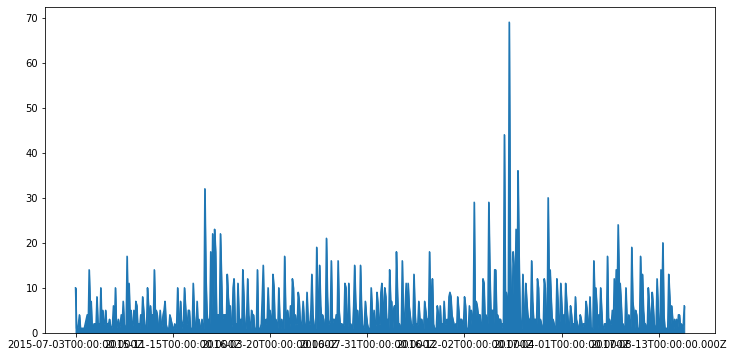

In [18]:
kindle['temp'] = kindle.date.apply(lambda x : pd.to_datetime(x))
kindle_review_dates = kindle.date.value_counts()
kindle_review_dates.sort_index(inplace=True)
kindle_review_dates.plot(kind='area',figsize=(12,6))

In [19]:
rating_perdate = kindle_review_dates.sort_values(ascending=False)
peakrating = rating_perdate[:20]
peak_month=[]
for x in peakrating.index:
    peak_month.append(pd.to_datetime(x).month)
pd.Series(peak_month).value_counts()

1     8
12    3
6     2
10    1
9     1
8     1
7     1
5     1
3     1
2     1
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013D0A9073C8>]],
      dtype=object)

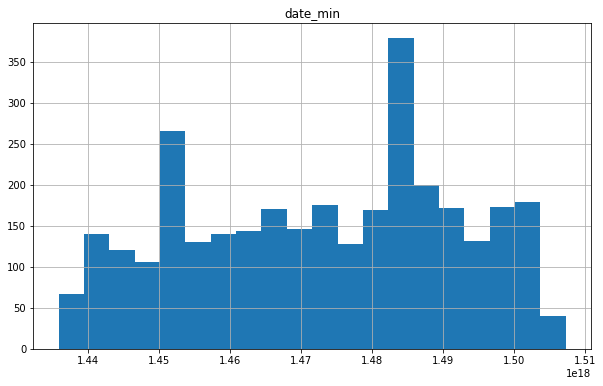

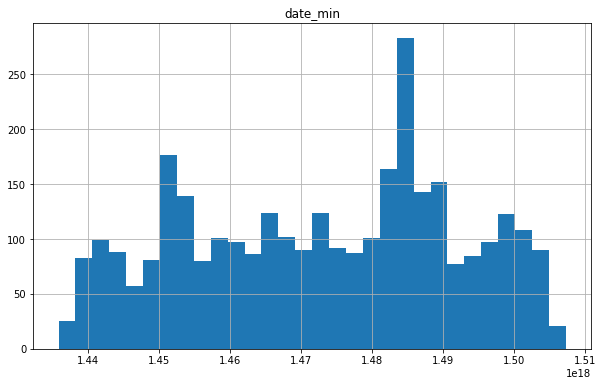

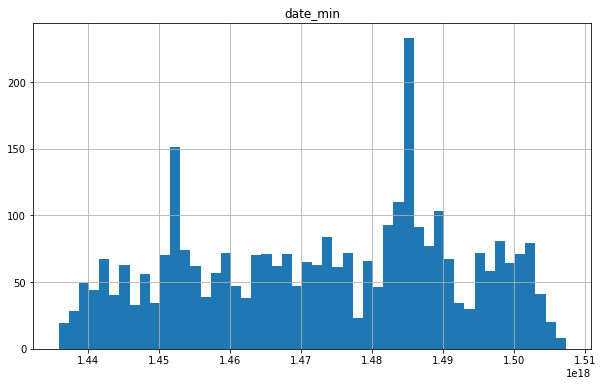

In [20]:
rating_series = pd.DataFrame(kindle.date)
dforms=[]
for x in rating_series.date:
    dforms.append((pd.to_datetime(x)).value)
# now we have dforms which has dates transformed to numeric values
rating2 = rating_series.assign(date_min = dforms)
rating2.reset_index(inplace=True)
#rating2.set_index('date_min')
#rating2.columns=['timestamp_string','review_count','date_min']
bins = np.linspace(min(rating2.date_min),max(rating2.date_min),num=50)
rating2.hist(column='date_min', bins=20,figsize=(10,6),)
rating2.hist(column='date_min', bins=30,figsize=(10,6))
rating2.hist(column='date_min', bins=50,figsize=(10,6))

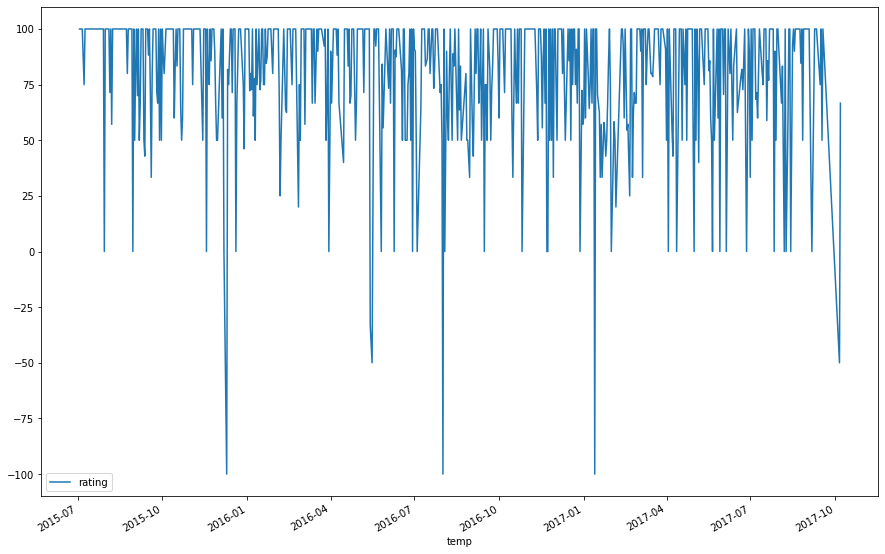

In [21]:
def NPS_eval (A):
    score =0
    for x in A[:]:
        if (x>4) :
            score+=1
        elif (x<4) :
            score-=1
    return 100*score/len(A)    
NPS_overtime = kindle[['temp','rating']]
NPS_overtime.groupby(by='temp').agg(NPS_eval).plot(figsize=(15,10))

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\parth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,rating
timeline,
34,37.500000
26,62.237762
25,66.000000
28,68.918919
14,69.411765
20,72.277228
12,73.000000
31,74.400000
21,75.324675


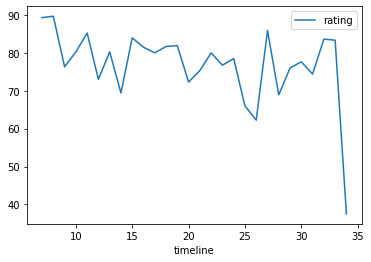

In [22]:
NPS_overtime['timeline']= NPS_overtime['temp'].apply(lambda x : (x.month+(12*(x.year-2015))))
NPS_by_month= NPS_overtime.groupby(by='timeline').agg(NPS_eval)
print(NPS_by_month.plot())
NPS_by_month.sort_values(by='rating')

In [23]:
comments = pd.concat([kindle['text']+". "+ kindle['title'],kindle['rating'],kindle['doRecommend']],axis=1)
comments.columns=['text','rating','recommend']

In [24]:
import string
import nltk
from nltk import PorterStemmer
import re 

stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()


def clean_stem (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3

def clean_lemma (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3

text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + "-".join(clean_stem(text)))
print("Lemmatized " + "-".join(clean_lemma(text)))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\parth/nltk_data'
    - 'C:\\Users\\parth\\anaconda3\\nltk_data'
    - 'C:\\Users\\parth\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\parth\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\parth\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
import string
import nltk
from nltk import PorterStemmer
import re 

stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()


def clean_stem (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3

def clean_lemma (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3

text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + "-".join(clean_stem(text)))
print("Lemmatized " + "-".join(clean_lemma(text)))

Stemmed hello-happiest-place-organ-organ-organ-happi-world-happi-much-happi-


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\parth/nltk_data'
    - 'C:\\Users\\parth\\anaconda3\\nltk_data'
    - 'C:\\Users\\parth\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\parth\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\parth\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [28]:
import string
import nltk
from nltk import PorterStemmer
import re 

stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()


def clean_stem (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3

def clean_lemma (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3

text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + "-".join(clean_stem(text)))
print("Lemmatized " + "-".join(clean_lemma(text)))

Stemmed hello-happiest-place-organ-organ-organ-happi-world-happi-much-happi-
Lemmatized hello-happiest-place-organize-organizes-organizing-happy-world-happiness-much-happy-


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectstem = TfidfVectorizer(analyzer=clean_stem)
vectlemm = TfidfVectorizer(analyzer=clean_lemma)

textfeatures=vectstem.fit_transform(comments['text'])
print("Stemmed - " + str(len(vectstem.get_feature_names())))

vectlemm.fit_transform(comments['text'])
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))

Stemmed - 3693
Lemmatized - 4547


In [31]:
pd.DataFrame(textfeatures.toarray()).head(15)

,0,1,2,3,4,5,6,7,8,9,...,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
textmatrix = pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)
textmatrix.head(5)

,nice,littl,set,slow,wish,would,investig,jump,like,long,...,git,vovag,sinpl,purpl,write,optioni,blackveri,onesveri,reliab,glich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
sum_scores = pd.DataFrame(textmatrix.sum(),columns=['sum_scores_TFIDF'])
sum_scores.head(10)

,sum_scores_TFIDF
nice,4.242392
littl,0.338632
set,0.515145
slow,4.349600
wish,4.576738
would,3.383977
investig,0.990953
jump,0.179253
like,0.145790
long,0.381124


In [34]:
# Need to see most important words in the reviews
# words used by many people or less frequent in sentences
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=True)[:5]

,sum_scores_TFIDF
gripe,0.076083
grandkid,0.076083
old,0.076083
cow,0.076083
felt,0.076083


In [36]:
#high usage of words in reviews
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=False)[:5]

,sum_scores_TFIDF
fool,217.397630
summer,209.501804
matt,198.910788
lighter,181.218969
purs,147.851506


In [37]:
pd.set_option('display.max_colwidth', 0)
comments.head()

,text,rating,recommend
17214,Its a nice little set up but it's slow. I wish I would have investigated them a little more before just jumping in.. I like it but....,3.0,True
17215,As long as apps are downloaded before leaving WIFI they work great for road trips or hunting trips!. Great for road trips!,5.0,True
17216,Was a gift for our 8 year old daughter. Great for kids. Great for kids,5.0,True
17217,my grandkids love it. This is the 3 one we bought.. kids love it,5.0,True
17218,Great case ok tablet no Android play store. Weak micro usb port. It's isn't an straight out the box tablet. Had to install Android play store on it. And as far as the charging port goes I'm on my 3rd one but best buy are the best with their return policy.... Tablet not for kids,3.0,True


In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

happy = "I am Happy. this is so awesome. I love life. I will be in heaven"
#when you find free food in university
print("happy " + str(sid.polarity_scores(text)))


sad = "i hate this. I am mad this is stupid. I will kill you"
#when your professor gives you a ZERO in assignment
print("sad " + str(sid.polarity_scores(sad)))

neut = "I will come. You should go. This is blue color"
#when you state facts and nothing else
print("dont care - " + str(sid.polarity_scores(neut)))

srishti = "money"
print("dss - " + str(sid.polarity_scores(srishti)))

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\parth/nltk_data'
    - 'C:\\Users\\parth\\anaconda3\\nltk_data'
    - 'C:\\Users\\parth\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\parth\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\parth\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [40]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\parth\AppData\Roaming\nltk_data...


True

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

happy = "I am Happy. this is so awesome. I love life. I will be in heaven"
#when you find free food in university
print("happy " + str(sid.polarity_scores(text)))


sad = "i hate this. I am mad this is stupid. I will kill you"
#when your professor gives you a ZERO in assignment
print("sad " + str(sid.polarity_scores(sad)))

neut = "I will come. You should go. This is blue color"
#when you state facts and nothing else
print("dont care - " + str(sid.polarity_scores(neut)))

srishti = "money"
print("dss - " + str(sid.polarity_scores(srishti)))

happy {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.9522}
sad {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.9432}
dont care - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dss - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [42]:
#FEATURE1:Sentiment compound value

def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)
comments['sentiment']= comments['text'].apply(lambda x : sentiment(x))

In [43]:
#FEATURE2: Length of string

comments['length'] = comments['text'].apply(lambda x : len(re.split('\W+',x)))
comments[comments['rating']==5].head(10)

# before we proceed - we need to convert all true >> 1 and false as 0
def convert(x):
    
    if x==True:
        return 1
    else :
        return 0
    
print(convert("False"))

comments['target_rec'] = comments['recommend'].apply(lambda x : convert(x))
comments.head(5)

0


,text,rating,recommend,sentiment,length,target_rec
17214,Its a nice little set up but it's slow. I wish I would have investigated them a little more before just jumping in.. I like it but....,3.0,True,0.8271,29,1
17215,As long as apps are downloaded before leaving WIFI they work great for road trips or hunting trips!. Great for road trips!,5.0,True,0.8684,23,1
17216,Was a gift for our 8 year old daughter. Great for kids. Great for kids,5.0,True,0.9022,15,1
17217,my grandkids love it. This is the 3 one we bought.. kids love it,5.0,True,0.8555,14,1
17218,Great case ok tablet no Android play store. Weak micro usb port. It's isn't an straight out the box tablet. Had to install Android play store on it. And as far as the charging port goes I'm on my 3rd one but best buy are the best with their return policy.... Tablet not for kids,3.0,True,0.9457,58,1


In [44]:
comments[comments['rating']==1].head(5)

,text,rating,recommend,sentiment,length,target_rec
17220,This product wouldn't turn on nor charge and then store couldn't locate another one for me.. Product Issues,1.0,False,0.0000,20,0
17423,"Would not take a charge, good thing i tried before wrapping it for Christmas.. Had to return this on Christmas eve day",1.0,False,-0.3412,22,0
17443,"I didon't care for this tablet, downloading apps outside of Amazon was really confusing.. Don't like...too hard to download other apps",1.0,False,-0.1611,24,0
17729,"I am really disappointed in this Kindle....I have had many kindles, but I wanted somwthing I thoughtnwould be simple. This kindle doesn't show all my books that are in my cloud..it doesn't matter that they aren't in my device but they should still show up in my cloud...I have to go to my amazon account and transfer the book I want to my device.. Great for someone who doesn't have alot of books",1.0,False,0.7809,80,0
17887,Paper white does not allow you do use books from the library as you cannot load apps. Only books from Amazon are available to read.. Unable to access library,1.0,False,0.0088,29,0


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

# need to reset index of the comments column to match with textfeatures
new_sentiment = comments.sentiment.reset_index()['sentiment']
new_length = comments.length.reset_index()['length']

x_features = pd.concat([new_sentiment,new_length,
                        pd.DataFrame(textfeatures.toarray(),
                        columns=vectstem.vocabulary_)],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features,comments.target_rec,test_size=0.2)

rf = RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=90)
rfmodel=rf.fit(x_train,y_train)

y_pred = rfmodel.predict(x_test)
sorted(zip(rfmodel.feature_importances_,x_train.columns),reverse=True)[0:10]


[(0.03280011117277051, 'sentiment'),
 (0.013683588832058044, 'length'),
 (0.012034672229620095, 'fool'),
 (0.011071865267087795, 'doesnot'),
 (0.010916154973848655, 'huge'),
 (0.01070503319373681, 'effici'),
 (0.009432206661947598, 'squeezi'),
 (0.0091647954822616, 'matt'),
 (0.008731858140763448, 'rightfirst'),
 (0.008679458067035097, 'colorbi')]

In [47]:
precision, recall, fscore , support = score(y_test,y_pred,average='binary')
print('RandonForest Classifier: Precision: {} / Recall :{} / Accuracy {} '.format(round(precision,3),
                                                         round(recall,3),
                                                         round((y_pred==y_test).sum()/len(y_test),3)))

RandonForest Classifier: Precision: 0.991 / Recall :1.0 / Accuracy 0.991 
